In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import plotly.express as px
from sklearn.decomposition import PCA
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('spy_engineered_v4.csv',index_col=0)
df.index = pd.to_datetime(df.index)
df

,movement,movement_prev_period,chg,chg_prev_period,vpoc_prev_period,total_volume_prev_period,vpoc_price_prev_period,tpoc_price_prev_period,open_prev_period,high_prev_period,...,vol_price_kurt_prev_period,trapped_longs_prev_period,trapped_shorts_prev_period,trapped_shorts_at_extremes_prev_period,trapped_longs_at_extremes_prev_period,trapped_at_extremes_volume_prev_period,period_idx,relative_volume_to_930,relative_volume_prev_period,success
period,,,,,,,,,,,,,,,,,,,,,
2024-04-22 09:35:00,1,0,0.0080,-0.1265,0.247937,628143.0,497.88,497.74,497.84,498.07,...,78.235,1,0,0,0,0.000000,0,1.000000,1.000000,0
2024-04-22 09:40:00,1,1,0.0080,0.0080,0.085825,206035.0,497.23,497.24,497.20,497.33,...,1.209,0,1,0,0,0.000000,1,0.328007,0.328007,0
2024-04-22 09:45:00,1,1,0.1287,0.0080,0.075736,166394.0,497.11,497.00,497.24,497.34,...,2.898,0,1,1,0,0.905946,2,0.264898,0.807601,1
2024-04-22 09:50:00,0,1,-0.0301,0.1287,0.036437,159041.0,497.43,497.60,497.29,497.96,...,0.057,0,1,0,0,0.000000,3,0.253192,0.955810,0
2024-04-22 09:55:00,0,0,-0.0442,-0.0301,0.082666,129267.0,498.00,497.86,497.94,498.01,...,-0.466,1,0,0,0,0.000000,4,0.205792,0.812790,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-03 15:35:00,1,0,0.0704,-0.0801,0.109146,108085.0,511.48,511.48,511.63,511.65,...,8.660,1,0,0,0,0.000000,72,0.144609,1.248599,0
2024-05-03 15:40:00,0,1,-0.0137,0.0704,0.066151,148962.0,511.57,511.56,511.22,511.75,...,0.818,0,1,0,0,0.000000,73,0.199299,1.378193,0
2024-05-03 15:45:00,0,0,-0.0665,-0.0137,0.110382,90649.0,511.51,511.49,511.58,511.74,...,2.396,0,0,1,0,0.575009,74,0.121281,0.608538,0


In [11]:
df.columns

Index(['movement', 'movement_prev_period', 'chg', 'chg_prev_period',
       'vpoc_prev_period', 'total_volume_prev_period',
       'vpoc_price_prev_period', 'tpoc_price_prev_period', 'open_prev_period',
       'high_prev_period', 'low_prev_period', 'close_prev_period',
       'vpoc_tpoc_ratio_prev_period', 'vpoc_open_ratio_prev_period',
       'tpoc_open_ratio_prev_period', 'vpoc_high_ratio_prev_period',
       'tpoc_high_ratio_prev_period', 'vpoc_low_ratio_prev_period',
       'tpoc_low_ratio_prev_period', 'vpoc_close_ratio_prev_period',
       'tpoc_close_ratio_prev_period', 'price_cv_prev_period',
       'price_skew_prev_period', 'price_kurt_prev_period',
       'vol_price_cv_prev_period', 'vol_price_skew_prev_period',
       'vol_price_kurt_prev_period', 'trapped_longs_prev_period',
       'trapped_shorts_prev_period', 'trapped_shorts_at_extremes_prev_period',
       'trapped_longs_at_extremes_prev_period',
       'trapped_at_extremes_volume_prev_period', 'period_idx',
       'rela

In [12]:
trapped_shorts = df[(df.trapped_shorts_at_extremes_prev_period == 1)]
trapped_longs = df[(df.trapped_longs_at_extremes_prev_period == 1)]

In [13]:
trapped_shorts.success.value_counts()

success
1    92
0    64
Name: count, dtype: int64

In [14]:
trapped_longs.success.value_counts()

success
0    88
1    68
Name: count, dtype: int64

In [15]:
trapped_longs.groupby(trapped_longs.index.time).success.value_counts().sort_values(ascending=False).reset_index()

,level_0,success,count
0,11:15:00,0,3
1,13:35:00,0,3
2,11:55:00,0,3
3,10:05:00,0,3
4,13:00:00,1,3
...,...,...,...
101,12:00:00,0,1
102,11:50:00,0,1
103,11:45:00,1,1
104,11:45:00,0,1


In [16]:
trapped_shorts.groupby(trapped_shorts.index.time).success.value_counts().sort_values(ascending=False).reset_index()

,level_0,success,count
0,11:20:00,1,4
1,12:35:00,1,4
2,15:30:00,0,3
3,14:50:00,1,3
4,12:10:00,1,3
...,...,...,...
96,11:40:00,1,1
97,11:40:00,0,1
98,11:35:00,1,1
99,11:25:00,0,1


In [17]:
features = [
    'movement_prev_period',
    'chg_prev_period',
    'vpoc_tpoc_ratio_prev_period', 
    'vpoc_open_ratio_prev_period',
    'tpoc_open_ratio_prev_period',
    'vpoc_high_ratio_prev_period',
    'tpoc_high_ratio_prev_period',
    'vpoc_low_ratio_prev_period',
    'vpoc_close_ratio_prev_period',
    'tpoc_close_ratio_prev_period',
    'price_cv_prev_period',
    'price_skew_prev_period',
    'price_kurt_prev_period',
    'vol_price_cv_prev_period',
    'vol_price_skew_prev_period',
    'vol_price_kurt_prev_period',
    'trapped_at_extremes_volume_prev_period',
    'period_idx',
    'relative_volume_to_930',
    'relative_volume_prev_period',
]

target = "success"

# trapped_longs = trapped_longs.drop(columns=cols_to_drop)
# trapped_shorts = trapped_shorts.drop(columns=cols_to_drop)

In [21]:
pca = PCA(2, random_state=1)
train_embeddings = pca.fit_transform(trapped_longs[features].values)

px.scatter(trapped_longs.reset_index(),x=train_embeddings[:,0],y=train_embeddings[:,1],color=trapped_longs[target].values,hover_data=trapped_longs.reset_index().columns)

In [22]:
pca = PCA(2, random_state=1)
train_embeddings = pca.fit_transform(trapped_shorts[features].values)

px.scatter(trapped_shorts.reset_index(),x=train_embeddings[:,0],y=train_embeddings[:,1],color=trapped_shorts[target].values,hover_data=trapped_shorts.reset_index().columns)

In [23]:
def tune_threshold(y_probs, threshold):
    
    """ Predicts target with varying the threshold"""
    y_pred_with_threshold = []

    for prob in y_probs[:,1]:
            if prob >= threshold:
                y_pred_with_threshold.append(1)
            else:
                y_pred_with_threshold.append(0)
    return np.array(y_pred_with_threshold)

In [99]:
xtrain_longs, xtest_longs, ytrain_longs, ytest_longs = train_test_split(trapped_longs[features],trapped_longs[target], random_state=1, train_size=0.8, stratify=trapped_longs[target], shuffle=True)
xtrain_shorts, xtest_shorts, ytrain_shorts, ytest_shorts = train_test_split(trapped_shorts[features],trapped_shorts[target], random_state=1, train_size=0.8, stratify=trapped_shorts[target], shuffle=True)

In [14]:
model = DecisionTreeClassifier(random_state=1,max_depth=5).fit(xtrain_longs, ytrain_longs)

print("Train")
c = 0.5
y_probs = model.predict_proba(xtrain_longs)
y_pred = tune_threshold(y_probs, threshold=c)
print(f'AUC: {roc_auc_score(ytrain_longs.values, y_pred)}')
print(classification_report(ytrain_longs.values, y_pred))
print(confusion_matrix(ytrain_longs.values, y_pred))
print("Test")
y_probs = model.predict_proba(xtest_longs)
y_pred = tune_threshold(y_probs, threshold=c)
print(f'AUC: {roc_auc_score(ytest_longs.values, y_pred)}')
print(classification_report(ytest_longs.values, y_pred))
print(confusion_matrix(ytest_longs.values, y_pred))

Train
AUC: 0.7225877192982455
              precision    recall  f1-score   support

           0       0.74      0.99      0.85        76
           1       0.96      0.46      0.62        48

    accuracy                           0.78       124
   macro avg       0.85      0.72      0.73       124
weighted avg       0.83      0.78      0.76       124

[[75  1]
 [26 22]]
Test
AUC: 0.5748987854251012
              precision    recall  f1-score   support

           0       0.64      0.84      0.73        19
           1       0.57      0.31      0.40        13

    accuracy                           0.62        32
   macro avg       0.61      0.57      0.56        32
weighted avg       0.61      0.62      0.59        32

[[16  3]
 [ 9  4]]


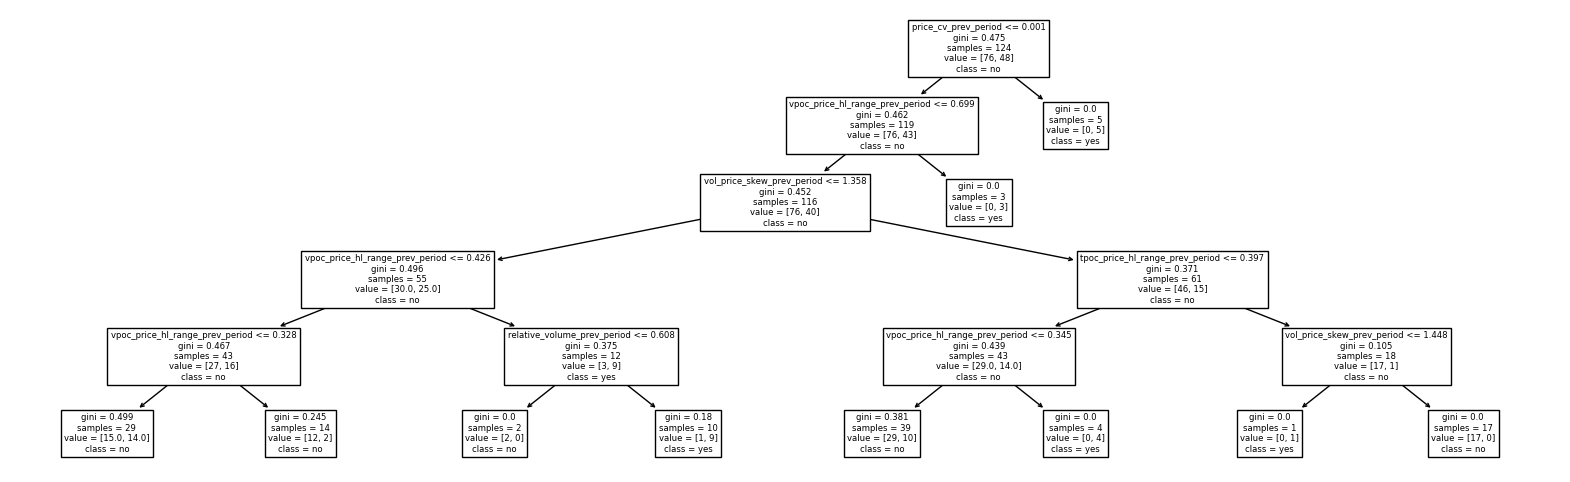

In [15]:
plt.figure(figsize=(20,6))
plot_tree(model, feature_names=xtrain_longs.columns, class_names=['no','yes'])
plt.show()

In [16]:
model = DecisionTreeClassifier(random_state=1, max_depth=5).fit(xtrain_shorts, ytrain_shorts)

print("Train")
c = 0.5
y_probs = model.predict_proba(xtrain_shorts)
y_pred = tune_threshold(y_probs, threshold=c)
print(f'AUC: {roc_auc_score(ytrain_shorts.values, y_pred)}')
print(classification_report(ytrain_shorts.values, y_pred))
print(confusion_matrix(ytrain_shorts.values, y_pred))
print("Test")
y_probs = model.predict_proba(xtest_shorts)
y_pred = tune_threshold(y_probs, threshold=c)
print(f'AUC: {roc_auc_score(ytest_shorts.values, y_pred)}')
print(classification_report(ytest_shorts.values, y_pred))
print(confusion_matrix(ytest_shorts.values, y_pred))

Train
AUC: 0.7916666666666667
              precision    recall  f1-score   support

           0       0.72      1.00      0.84        64
           1       1.00      0.58      0.74        60

    accuracy                           0.80       124
   macro avg       0.86      0.79      0.79       124
weighted avg       0.86      0.80      0.79       124

[[64  0]
 [25 35]]
Test
AUC: 0.3725490196078431
              precision    recall  f1-score   support

           0       0.41      0.41      0.41        17
           1       0.33      0.33      0.33        15

    accuracy                           0.38        32
   macro avg       0.37      0.37      0.37        32
weighted avg       0.38      0.38      0.38        32

[[ 7 10]
 [10  5]]


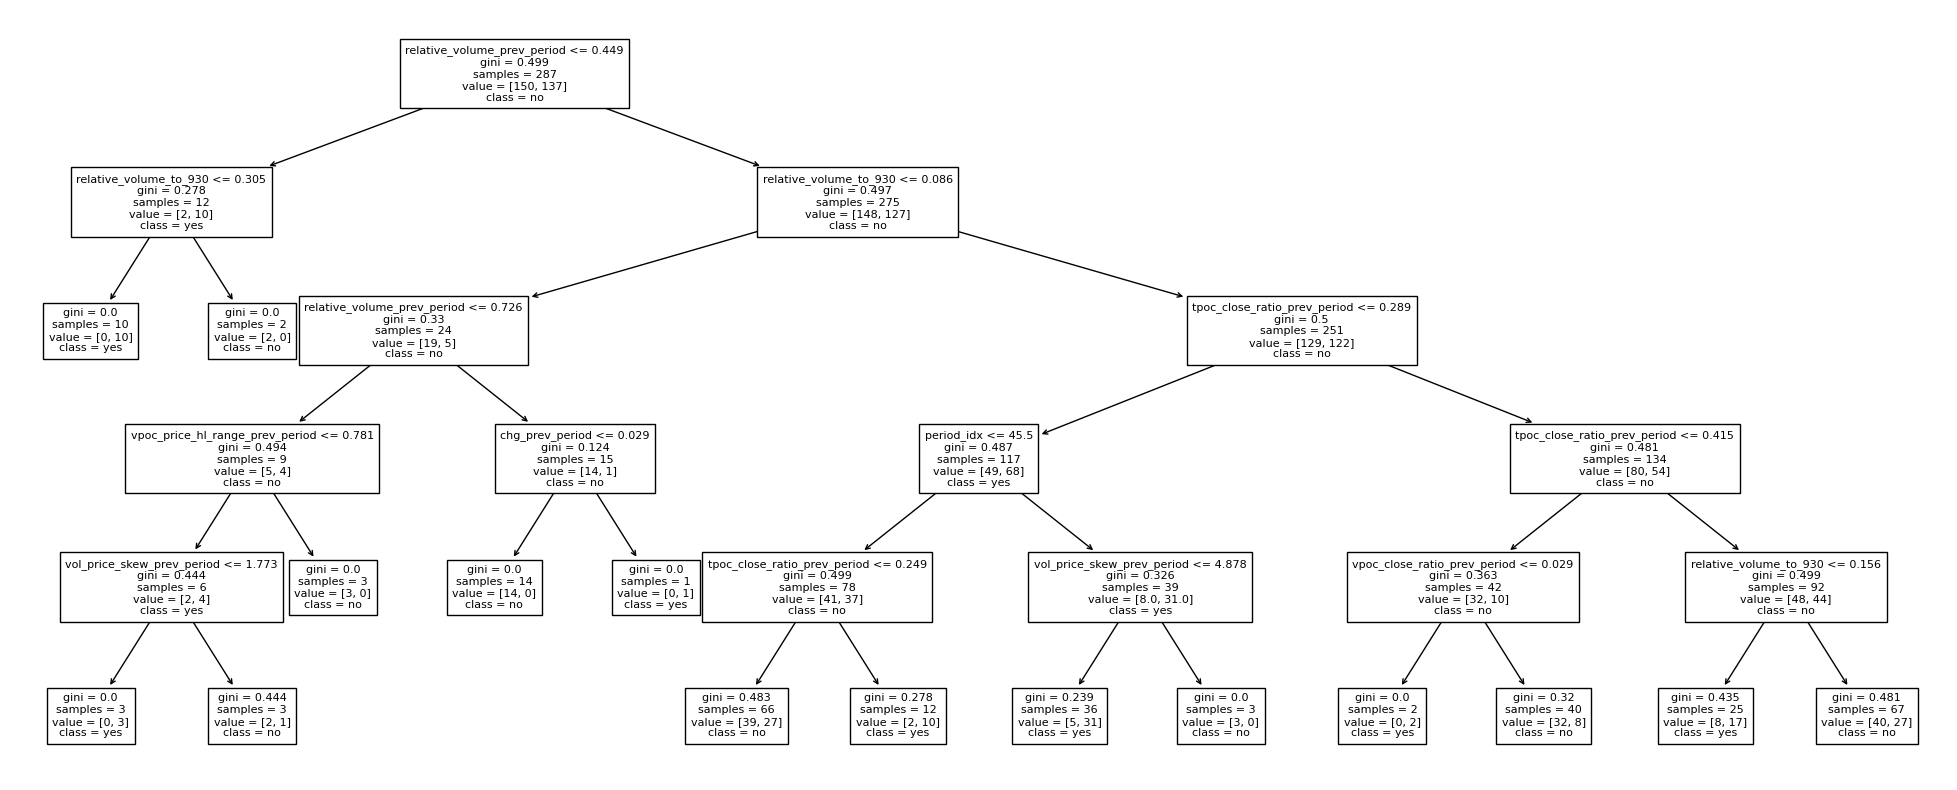

In [18]:
plt.figure(figsize=(25,10))
plot_tree(model, feature_names=xtrain_shorts.columns, class_names=['no','yes'],fontsize=8)
plt.show()

In [79]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

xtrain_longs, xtest_longs, ytrain_longs, ytest_longs = train_test_split(trapped_longs[features],trapped_longs[target], random_state=1, train_size=0.7, stratify=trapped_longs[target], shuffle=True)
xtrain_shorts, xtest_shorts, ytrain_shorts, ytest_shorts = train_test_split(trapped_shorts[features],trapped_shorts[target], random_state=1, train_size=0.7, stratify=trapped_shorts[target], shuffle=True)

param_grid = [
  {'max_depth': [3, 5, 7, 10, 12, 15, None], 'class_weight': [None, 'balanced'], 'min_impurity_decrease': [0,0.1,0.2,0.3,0.4], 'min_samples_split': [2,4,6,8,10], 'min_samples_leaf': [1, 3, 5, 7, 10]},
]

clf = GridSearchCV(DecisionTreeClassifier(), param_grid)

In [80]:
clf.fit(xtrain_longs, ytrain_longs)
sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_class_weight',
 'param_max_depth',
 'param_min_impurity_decrease',
 'param_min_samples_leaf',
 'param_min_samples_split',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [24]:
import xgboost as xgb

In [44]:
xtrain_longs, xtest_longs, ytrain_longs, ytest_longs = train_test_split(trapped_longs[features],trapped_longs[target], random_state=1, train_size=0.6, stratify=trapped_longs[target], shuffle=True)

param = {}
param['booster'] = 'gbtree'
param['objective'] = 'binary:logistic'
param["eval_metric"] = "auc"
param['learning_rate'] = 0.3
param['n_estimators'] = 5000
param['early_stopping_rounds'] = 100
# param['gamma'] = 0
param['reg_alpha'] = 0.0
param['reg_lambda'] = 0.1
param['max_depth'] = 5
param['min_child_weight'] = 4
param['max_delta_step'] = 0
param['subsample'] = 1
param['colsample_bytree'] = 1
param['seed'] = 0
# param['base_score'] = ytrain_longs.mean()
param['base_score'] = 0.5
param['n_jobs'] = -1
# param['verbosity'] = 3


trapped_longs_model = xgb.XGBClassifier().set_params(**param)

trapped_longs_model = trapped_longs_model.fit(xtrain_longs.values, ytrain_longs.values, eval_set=[(xtest_longs.values, ytest_longs.values)])

print("Train")
# c = ytrain_longs.mean()
c = 0.5
y_probs = trapped_longs_model.predict_proba(xtrain_longs.values)
y_pred = tune_threshold(y_probs, threshold=c)
print(f'AUC: {roc_auc_score(ytrain_longs.values, y_pred)}')
print(classification_report(ytrain_longs.values, y_pred))
print(confusion_matrix(ytrain_longs, y_pred))
print("Test")
y_probs = trapped_longs_model.predict_proba(xtest_longs.values)
y_pred = tune_threshold(y_probs, threshold=c)
print(f'AUC: {roc_auc_score(ytest_longs.values, y_pred)}')
print(classification_report(ytest_longs.values, y_pred))
print(confusion_matrix(ytest_longs.values, y_pred))
print(f"threshold: {c}")

[0]	validation_0-auc:0.36420
[1]	validation_0-auc:0.39095
[2]	validation_0-auc:0.37654
[3]	validation_0-auc:0.38323
[4]	validation_0-auc:0.36780
[5]	validation_0-auc:0.37346
[6]	validation_0-auc:0.38066
[7]	validation_0-auc:0.36934
[8]	validation_0-auc:0.37603
[9]	validation_0-auc:0.38220
[10]	validation_0-auc:0.38632
[11]	validation_0-auc:0.38014
[12]	validation_0-auc:0.37706
[13]	validation_0-auc:0.38323
[14]	validation_0-auc:0.37294
[15]	validation_0-auc:0.37191
[16]	validation_0-auc:0.37449
[17]	validation_0-auc:0.37243
[18]	validation_0-auc:0.37860
[19]	validation_0-auc:0.39506
[20]	validation_0-auc:0.39815
[21]	validation_0-auc:0.39918
[22]	validation_0-auc:0.41049
[23]	validation_0-auc:0.41667
[24]	validation_0-auc:0.42901
[25]	validation_0-auc:0.43210
[26]	validation_0-auc:0.44136
[27]	validation_0-auc:0.44136
[28]	validation_0-auc:0.43827
[29]	validation_0-auc:0.45473
[30]	validation_0-auc:0.45576
[31]	validation_0-auc:0.45679


[32]	validation_0-auc:0.45576
[33]	validation_0-auc:0.45679
[34]	validation_0-auc:0.45782
[35]	validation_0-auc:0.45165
[36]	validation_0-auc:0.46193
[37]	validation_0-auc:0.46502
[38]	validation_0-auc:0.46914
[39]	validation_0-auc:0.47428
[40]	validation_0-auc:0.47634
[41]	validation_0-auc:0.48251
[42]	validation_0-auc:0.48560
[43]	validation_0-auc:0.48148
[44]	validation_0-auc:0.47634
[45]	validation_0-auc:0.47737
[46]	validation_0-auc:0.48045
[47]	validation_0-auc:0.47942
[48]	validation_0-auc:0.47325
[49]	validation_0-auc:0.47737
[50]	validation_0-auc:0.48045
[51]	validation_0-auc:0.47737
[52]	validation_0-auc:0.47531
[53]	validation_0-auc:0.48148
[54]	validation_0-auc:0.48457
[55]	validation_0-auc:0.48663
[56]	validation_0-auc:0.49177
[57]	validation_0-auc:0.49897
[58]	validation_0-auc:0.49280
[59]	validation_0-auc:0.49074
[60]	validation_0-auc:0.49486
[61]	validation_0-auc:0.48765
[62]	validation_0-auc:0.48457
[63]	validation_0-auc:0.48560
[64]	validation_0-auc:0.49280
[65]	valid

In [45]:
xtrain_shorts, xtest_shorts, ytrain_shorts, ytest_shorts = train_test_split(trapped_shorts[features],trapped_shorts[target], random_state=1, train_size=0.6, stratify=trapped_shorts[target], shuffle=True)

param = {}
param['booster'] = 'gbtree'
param['objective'] = 'binary:logistic'
param["eval_metric"] = "auc"
param['learning_rate'] = 0.1
param['n_estimators'] = 5000
param['early_stopping_rounds'] = 100
# param['gamma'] = 0
param['reg_alpha'] = 0.0
param['reg_lambda'] = 0.1
param['max_depth'] = 5
param['min_child_weight'] = 4
param['max_delta_step'] = 0
param['subsample'] = 1
param['colsample_bytree'] = 1
param['seed'] = 0
param['base_score'] = ytrain_shorts.mean()
# param['base_score'] = 0.5
param['n_jobs'] = -1
# param['verbosity'] = 3


trapped_shorts_model = xgb.XGBClassifier().set_params(**param)

trapped_shorts_model = trapped_shorts_model.fit(xtrain_shorts.values, ytrain_shorts.values, eval_set=[(xtest_shorts.values, ytest_shorts.values)])

print("Train")
c = ytrain_shorts.mean()
c = 0.9
y_probs = trapped_shorts_model.predict_proba(xtrain_shorts.values)
y_pred = tune_threshold(y_probs, threshold=c)
print(f'AUC: {roc_auc_score(ytrain_shorts.values, y_pred)}')
print(classification_report(ytrain_shorts.values, y_pred))
print(confusion_matrix(ytrain_shorts, y_pred))
print("Test")
y_probs = trapped_shorts_model.predict_proba(xtest_shorts.values)
y_pred = tune_threshold(y_probs, threshold=c)
print(f'AUC: {roc_auc_score(ytest_shorts.values, y_pred)}')
print(classification_report(ytest_shorts.values, y_pred))
print(confusion_matrix(ytest_shorts.values, y_pred))
print(f"threshold: {c}")

[0]	validation_0-auc:0.58472
[1]	validation_0-auc:0.58472
[2]	validation_0-auc:0.61435


[3]	validation_0-auc:0.61694
[4]	validation_0-auc:0.61590
[5]	validation_0-auc:0.59511
[6]	validation_0-auc:0.59511
[7]	validation_0-auc:0.60239
[8]	validation_0-auc:0.62838
[9]	validation_0-auc:0.59823
[10]	validation_0-auc:0.59719
[11]	validation_0-auc:0.61746
[12]	validation_0-auc:0.62474
[13]	validation_0-auc:0.61331
[14]	validation_0-auc:0.61538
[15]	validation_0-auc:0.60655
[16]	validation_0-auc:0.59927
[17]	validation_0-auc:0.60759
[18]	validation_0-auc:0.61486
[19]	validation_0-auc:0.62630
[20]	validation_0-auc:0.62734
[21]	validation_0-auc:0.63150
[22]	validation_0-auc:0.62110
[23]	validation_0-auc:0.62630
[24]	validation_0-auc:0.63150
[25]	validation_0-auc:0.63669
[26]	validation_0-auc:0.63462
[27]	validation_0-auc:0.63462
[28]	validation_0-auc:0.64085
[29]	validation_0-auc:0.63565
[30]	validation_0-auc:0.63981
[31]	validation_0-auc:0.63565
[32]	validation_0-auc:0.63565
[33]	validation_0-auc:0.63669
[34]	validation_0-auc:0.63150
[35]	validation_0-auc:0.63150
[36]	validation_0